<a href="https://colab.research.google.com/github/fikramikom/Belajar-Data-sciens/blob/main/Metode%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KB/iris.csv',  sep=",")
print(df)
df.head()

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


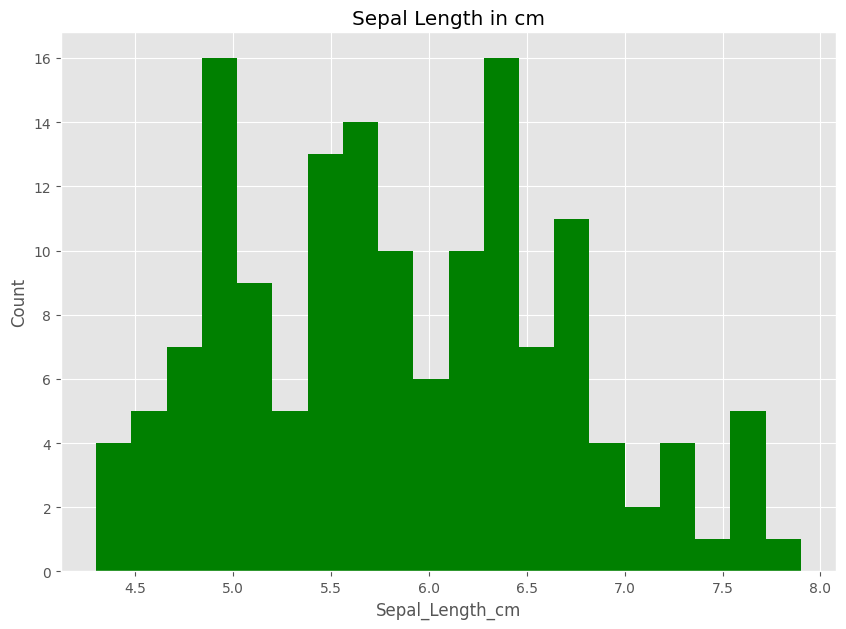

In [ ]:
plt.figure(figsize = (10, 7))
x = df["sepal.length"]
plt.hist(x, bins = 20, color = "green")
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")
plt.show()

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


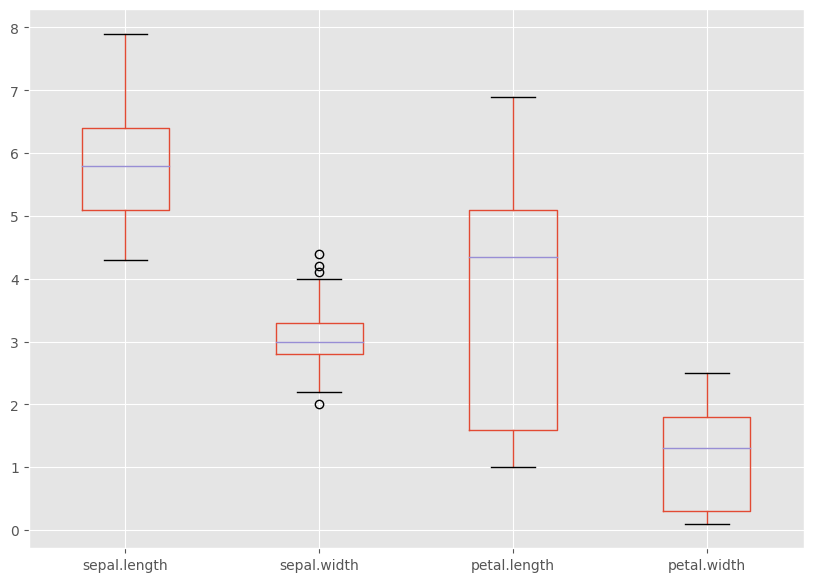

In [ ]:
# show the box plot
new_data = df[["sepal.length", "sepal.width", "petal.length",
"petal.width"]]
print(new_data.head())
plt.figure(figsize = (10, 7))
new_data.boxplot()
plt.show()

In [ ]:
# variabel bebas
x = df.drop(["variety"], axis = 1)
x.head()
#variabel tidak bebas
y = df["variety"]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [ ]:
# separate the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =
0.2, random_state = 5)
#import from library
from sklearn.naive_bayes import GaussianNB
# Call Gaussian Naive Bayes
iris_model = GaussianNB()

In [ ]:
# Insert the training dataset to Naive Bayes function
NB_train = iris_model.fit(x_train, y_train)

In [ ]:
# Next step: Prediction the x_test to the model built and save to the y_pred variable
# show the result of prediction
y_pred = NB_train.predict(x_test)
np.array(y_pred)
# show the y_test based on separation dataset
np.array(y_test)

array(['Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica'],
      dtype=object)

In [ ]:
# this value will show all probability for each predicted class
NB_train.predict_proba(x_test)

array([[5.30085641e-063, 9.99981862e-001, 1.81383617e-005],
       [2.33789935e-148, 6.30886847e-001, 3.69113153e-001],
       [1.96263359e-196, 4.91363272e-007, 9.99999509e-001],
       [1.00000000e+000, 1.14656751e-018, 4.49822440e-027],
       [5.25023564e-268, 1.22602746e-012, 1.00000000e+000],
       [3.69701688e-035, 9.99999868e-001, 1.32443809e-007],
       [1.00000000e+000, 2.51013111e-017, 5.52818684e-026],
       [2.28418536e-131, 1.07634152e-001, 8.92365848e-001],
       [1.00000000e+000, 5.44261227e-016, 1.20097067e-024],
       [8.96209989e-099, 9.91260655e-001, 8.73934453e-003],
       [3.07281738e-099, 9.89683769e-001, 1.03162310e-002],
       [1.46506375e-128, 7.68601918e-001, 2.31398082e-001],
       [1.77488452e-219, 1.47076918e-007, 9.99999853e-001],
       [2.41148452e-222, 1.76713485e-006, 9.99998233e-001],
       [1.00000000e+000, 3.93692194e-014, 2.48181020e-022],
       [1.00000000e+000, 5.59124686e-011, 3.78482609e-019],
       [2.39814803e-138, 1.07467031e-001

In [ ]:
# show the confusion matrix based on the prediction result
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  2,  9]])

In [ ]:
#evaluate performance from the confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.83      0.91      0.87        11
   Virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

